In [125]:
import numpy as np
import matplotlib.pylab as plt

def curvefitting(x,y):
    matriz = np.zeros((len(x),len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
            matriz[i,j] = x[i]**(j)
    coef = list(np.linalg.solve(matriz,y))
    x = np.array(x)
    x0 = np.linspace(x.min(),x.max(),200)
    y0 = np.zeros(len(x0))
    for c in coef:
        y0 += c*x0**coef.index(c)
    image = plt.figure()
    plt.scatter(x,y,s=15, c='black',label='data')
    plt.plot(x0,y0, c='g',label='fit')
    plt.legend()
    plt.title('Polynomial fit')
    return coef, image

Los coeficientes son:  [13.557372353142744, -144.9810237637978, 582.8828023801378, -1071.867561638978, 934.0216077527194, -313.8500287373889]


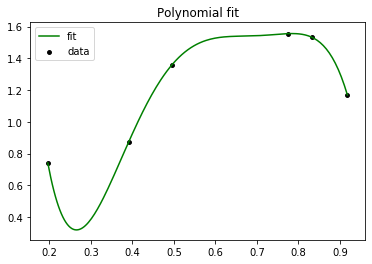

In [126]:
y = [1.532356183506048, 0.8706975582059675, 1.358901065799929, 1.169643319933416, 1.555334219343767, 0.7409785072098526]
x = [0.832532598430495, 0.39088498645803, 0.4954283209246325, 0.9178255640751934, 0.7739524024115277, 0.1966454680575301] 
coef,image = curvefitting(x,y)
print ('Los coeficientes son: ',coef)
image.savefig('fitting_06.png')

In [127]:
def curvefitting2(x,y):
    x = np.array(x)
    x0 = np.linspace(x.min(),x.max(),200)
    mcte = np.ones((len(x),1))
    ccoef = np.matmul(np.linalg.pinv(mcte),y)
    ycte = ccoef*np.ones(len(x0))
    mlin = np.zeros((len(x),2))
    for i in range(len(x)):
        for j in range(2):
            mlin[i,j] = x[i]**(j)
    lcoef = list(np.matmul(np.linalg.pinv(mlin),y))
    ylin = np.zeros(len(x0))
    for c in lcoef:
        ylin += c*x0**lcoef.index(c)
    mquad = np.zeros((len(x),3))
    for i in range(len(x)):
        for j in range(3):
            mquad[i,j] = x[i]**(j)
    qcoef = list(np.matmul(np.linalg.pinv(mquad),y))
    yquad = np.zeros(len(x0))
    for c in qcoef:
        yquad += c*x0**qcoef.index(c)                
    image = plt.figure()
    plt.scatter(x,y,s=15, c='black',label='data')
    plt.plot(x0,ycte,label='cte')
    plt.plot(x0,ylin,label='linear')
    plt.plot(x0,yquad,label='quadratic')
    plt.legend()
    plt.title('Data fitting')
    plt.savefig('polynomialFit2.png')
    return ccoef, lcoef, qcoef, image

Coeficiente función constante:  [1.30394658]
Coeficientes función linear:  [0.6016944958589373, 1.4267022253722774]
Coeficientes función cuadrática:  [0.47170595353828815, 2.098726612378032, -0.721065854503872]


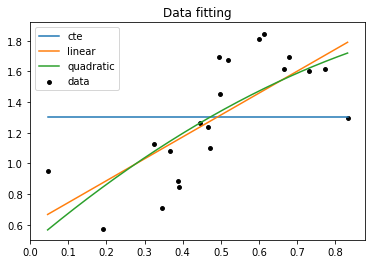

In [128]:
x1 = [0.832532598430495,0.39088498645803,0.4954283209246325,0.5178255640751934,0.7739524024115277,0.4966454680575301
      ,0.3668105457033554,0.3234585771647255,0.6653014165054433,0.4446875302281453,0.4718008559676279,0.04567485192931046
      ,0.6798066988460711,0.601143883073631,0.6132847235164077,0.3469150010516915,0.7311177081441746,0.3889625480481207
      ,0.191928050205252,0.4662482985604684]
y1 = [1.297511524051863,0.8483790479522098,1.690922020192675,1.672816448801667,1.613481613140477,1.452615206299254
      ,1.078872444621157,1.12770858603238,1.613358026840526,1.26503217161283,1.101699432511154,0.9532733411776386
      ,1.693061141199092,1.812989788127414,1.845978079492093,0.7098826230733248,1.604001619745593,0.8836594068650128
      ,0.5751329181266039,1.23855617359788]
c,c1,c2,image = curvefitting2(x1,y1)
print('Coeficiente función constante: ',c)
print('Coeficientes función linear: ',c1)
print('Coeficientes función cuadrática: ',c2)
image.savefig('fitting_20.png')